=== 台灣主要火車站距離分析與MDS降維 ===

1. 計算火車站間距離...
2. 建立距離表格...

火車站間距離矩陣（公里）：
       台北車站   新竹車站   台中車站   斗六車站   高雄車站   花蓮車站   台東車站
台北車站    0.0   61.5  131.6  185.1  296.0  190.2  258.3
新竹車站   61.5    0.0   79.6  133.4  251.3  170.5  228.3
台中車站  131.6   79.6    0.0   54.1  172.2  118.4  159.4
斗六車站  185.1  133.4   54.1    0.0  121.0  112.6  126.8
高雄車站  296.0  251.3  172.2  121.0    0.0  141.9   83.5
花蓮車站  190.2  170.5  118.4  112.6  141.9    0.0   74.0
台東車站  258.3  228.3  159.4  126.8   83.5   74.0    0.0

3. 執行多維尺度分析（MDS）...
應力值（Stress）: 1.2937
4. 繪製MDS二維投影圖...


c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from current font.
c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
c:\Users\user\anaconda3\envs\pytorchML\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from curren

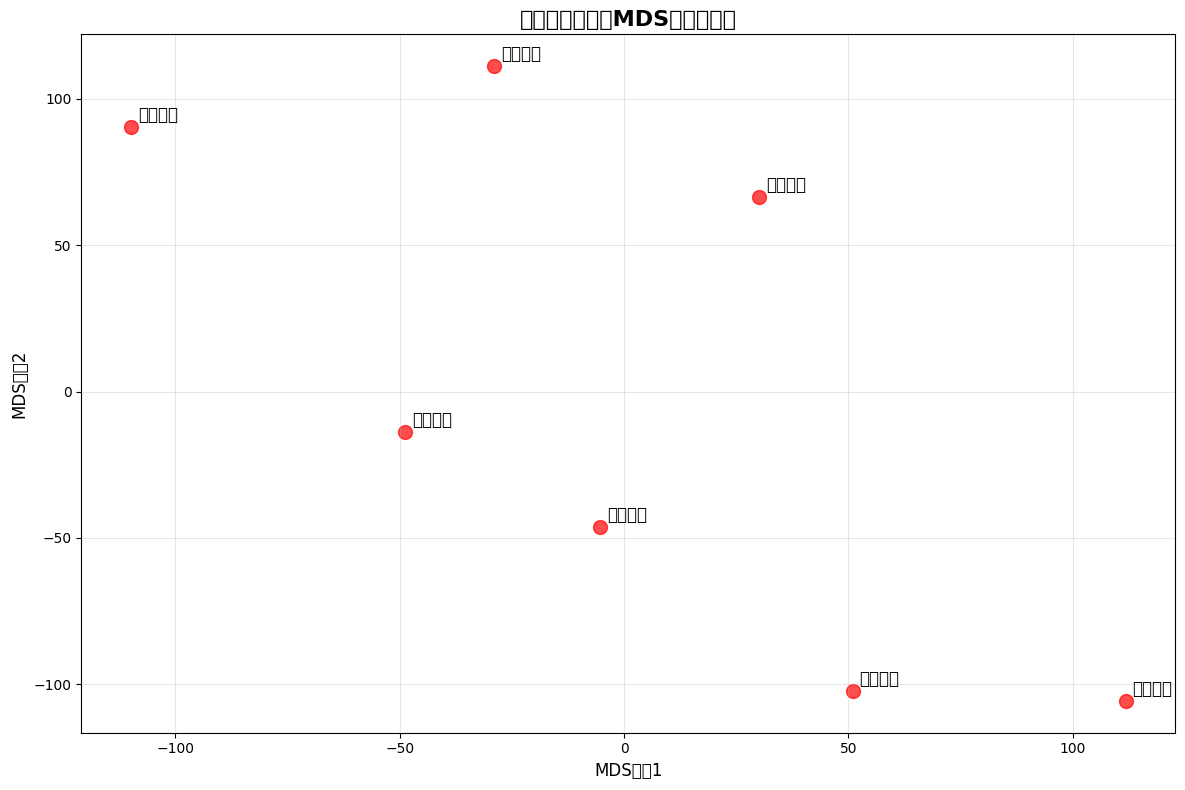

5. 建立Google地圖標記...
Google地圖已儲存為 'taiwan_train_stations_map.html'

MDS二維座標：
         MDS_X     MDS_Y
台北車站  111.8217 -105.7171
新竹車站   50.9825 -102.4553
台中車站   -5.4113  -46.2862
斗六車站  -48.7168  -13.8558
高雄車站 -109.9074   90.4794
花蓮車站   30.1493   66.5878
台東車站  -28.9180  111.2472


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import folium
from folium import plugins

# 火車站資料
station_names = ['台北車站', '新竹車站', '台中車站', '斗六車站', '高雄車站', '花蓮車站', '台東車站']
station_coords = [
    (25.047924, 121.517491), # 台北車站
    (24.805832, 120.968798), # 新竹車站
    (24.137611, 120.685417), # 台中車站
    (23.711975, 120.427538), # 斗六車站
    (22.629611, 120.301388), # 高雄車站
    (23.33825, 121.454262),  # 花蓮車站
    (22.756391, 121.103889)  # 台東車站
]

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    計算兩點間的大圓距離（公里）
    使用Haversine公式
    """
    # 轉換為弧度
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine公式
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    # 地球半徑（公里）
    r = 6371
    return c * r

def create_distance_matrix(coords):
    """
    建立距離矩陣
    """
    n = len(coords)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                lat1, lon1 = coords[i]
                lat2, lon2 = coords[j]
                distance_matrix[i][j] = haversine_distance(lat1, lon1, lat2, lon2)
    
    return distance_matrix

def perform_mds(distance_matrix):
    """
    執行多維尺度分析（MDS）
    """
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords_2d = mds.fit_transform(distance_matrix)
    return coords_2d, mds

def plot_mds_results(coords_2d, station_names):
    """
    繪製MDS結果
    """
    plt.figure(figsize=(12, 8))
    plt.scatter(coords_2d[:, 0], coords_2d[:, 1], s=100, c='red', alpha=0.7)
    
    # 添加標籤
    for i, name in enumerate(station_names):
        plt.annotate(name, (coords_2d[i, 0], coords_2d[i, 1]), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=12, ha='left')
    
    plt.title('台灣主要火車站MDS二維投影圖', fontsize=16, fontweight='bold')
    plt.xlabel('MDS維度1', fontsize=12)
    plt.ylabel('MDS維度2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_distance_table(distance_matrix, station_names):
    """
    建立距離表格
    """
    df = pd.DataFrame(distance_matrix, 
                     index=station_names, 
                     columns=station_names)
    df = df.round(1)  # 四捨五入到小數點後一位
    return df

def create_google_map(station_coords, station_names):
    """
    建立Google地圖標記
    """
    # 計算地圖中心點
    center_lat = sum([coord[0] for coord in station_coords]) / len(station_coords)
    center_lon = sum([coord[1] for coord in station_coords]) / len(station_coords)
    
    # 創建地圖
    m = folium.Map(location=[center_lat, center_lon], zoom_start=7)
    
    # 添加標記
    for i, (name, coord) in enumerate(zip(station_names, station_coords)):
        folium.Marker(
            location=[coord[0], coord[1]],
            popup=f'{name}<br>緯度: {coord[0]}<br>經度: {coord[1]}',
            tooltip=name,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)
    
    # 添加連線（可選）
    coordinates = [[coord[0], coord[1]] for coord in station_coords]
    
    return m

def main():
    """
    主程式
    """
    print("=== 台灣主要火車站距離分析與MDS降維 ===\n")
    
    # 1. 建立距離矩陣
    print("1. 計算火車站間距離...")
    distance_matrix = create_distance_matrix(station_coords)
    
    # 2. 建立距離表格
    print("2. 建立距離表格...")
    distance_df = create_distance_table(distance_matrix, station_names)
    print("\n火車站間距離矩陣（公里）：")
    print(distance_df)
    
    # 3. 執行MDS
    print("\n3. 執行多維尺度分析（MDS）...")
    coords_2d, mds = perform_mds(distance_matrix)
    print(f"應力值（Stress）: {mds.stress_:.4f}")
    
    # 4. 繪製MDS結果
    print("4. 繪製MDS二維投影圖...")
    plot_mds_results(coords_2d, station_names)
    
    # 5. 建立Google地圖
    print("5. 建立Google地圖標記...")
    map_obj = create_google_map(station_coords, station_names)
    map_obj.save('taiwan_train_stations_map.html')
    print("Google地圖已儲存為 'taiwan_train_stations_map.html'")
    
    # 6. 輸出MDS座標
    print("\nMDS二維座標：")
    mds_df = pd.DataFrame(coords_2d, 
                         index=station_names, 
                         columns=['MDS_X', 'MDS_Y'])
    print(mds_df.round(4))
    
    return distance_matrix, coords_2d, map_obj

# 執行程式
if __name__ == "__main__":
    distance_matrix, mds_coords, map_obj = main()

In [4]:
def main():
    """主執行函數"""
    print("=== 機器學習作業四：維度縮減 ===")
    
    # 1. 火車站距離MDS分析
    print("\n1. 執行火車站距離MDS分析...")
    distance_matrix, station_names = calculate_distance_matrix(stations)
    mds_coords = plot_mds_stations(distance_matrix, station_names)
    map_obj = create_google_map(stations)
    map_obj.save('stations_map.html')
    print("   - MDS視覺化完成")
    print("   - 地圖已儲存為 stations_map.html")